In [ ]:
import datetime
from metadata import *
import trackpy
from functools import partial
import multiprocessing
from hybescope_confpig.microscope_config import *
import os
import pickle

def new_find_beads(path,md,pos,hybe):
    if os.path.exists(os.path.join(path,pos,hybe,'bead.pkl')):
        print(pos, hybe, 'is already done!')
    else:
        start = datetime.datetime.now()
        temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
        temp_max = temp_stk.max()
        temp_min = temp_stk.min()
        temp_stk = (temp_stk-temp_min)/(temp_max-temp_min)
        for y, x in hot_pixels:
            temp_stk[y, x,:] = 0;
        temp_stk = np.swapaxes(np.swapaxes(temp_stk,1,2),0,1)
        bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
        end = datetime.datetime.now()
        if not os.path.exists(path):
            print('path doesnt exist')
        if not os.path.exists(os.path.join(path,pos)):
            os.mkdir(os.path.join(path,pos))
        if not os.path.exists(os.path.join(path,pos,hybe)):
            os.mkdir(os.path.join(path,pos,hybe))
        pickle.dump(bead_df, open(os.path.join(path,pos,hybe,'bead.pkl'),'wb'))
        print('\n','Started',pos,hybe,'at',start)
        print('\n','Ended',pos,hybe,'at',end)
        del temp_stk
        del bead_df
    return pos,hybe

def bead_wrapper(path,md,pos):
    for hybe in md.hybenames:
        pos,hybe = new_find_beads(path,md,pos,hybe)
    return pos
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/new_bead_finder'
md = Metadata()
posnames = md.posnames'/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17'
posnames = [pos for pos in posnames if "Pos" in pos]
ncpu = 12
full_test_beads = {}
os.environ['MKL_NUM_THREADS'] = '3'
os.environ['GOTO_NUM_THREADS'] = '3'
os.environ['OMP_NUM_THREADS'] = '3'
with multiprocessing.Pool(ncpu) as p:
    pfunc = partial(bead_wrapper,path,md)
    for pos in p.imap(pfunc,posnames):
        print('\n',pos, 'finished')

Pos0 hybe1 is already done!
Pos0 hybe2 is already done!
Pos0 hybe3 is already done!
Pos0 hybe4 is already done!
opening img_Pos0_000000026_000000000_DeepBlue_000_026.tifPos1 hybe1 is already done!
Pos1 hybe2 is already done!
Pos1 hybe3 is already done!
Pos1 hybe4 is already done!
Pos1 hybe5 is already done!
opening img_Pos1_000000011_000000000_DeepBlue_000_011.tifPos2 hybe1 is already done!
Pos2 hybe2 is already done!
opening img_Pos0_000000051_000000000_DeepBlue_000_051.tifPos3 hybe1 is already done!
Pos3 hybe2 is already done!
Pos3 hybe3 is already done!
Pos3 hybe4 is already done!
Pos3 hybe5 is already done!
opening img_Pos3_000000006_000000000_DeepBlue_000_006.tifPos4 hybe1 is already done!
Pos4 hybe2 is already done!
opening img_Pos0_000000064_000000000_DeepBlue_000_064.tifPos5 hybe1 is already done!
Pos5 hybe2 is already done!
Pos5 hybe3 is already done!
Pos5 hybe4 is already done!
opening img_Pos5_000000004_000000000_DeepBlue_000_004.tifPos6 hybe1 is already done!
opening img_Po

In [ ]:
if os.path.exists(os.path.join(path,pos,hybe,'bead.pkl')):
        bead_df = pickle.load(open(os.path.join(path,pos,hybe,'bead.pkl'),'rb'))
def bead_wrapper(path,md,pos):
    pos_bead_dict = {}
    for hybe in md.hybenames:
        if os.path.exists(os.path.join(path,pos,hybe,'bead.pkl')):
            bead_df = pickle.load(open(os.path.join(path,pos,hybe,'bead.pkl'),'rb'))
            bead_df = bead_df[(bead_df.size_x<2.3)]
            bead_df = bead_df[(bead_df.size_y<2.3)]
        pos_bead_dict[hybe] = bead_df
    return pos_bead_dict,pos
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/new_bead_finder'
md = Metadata('/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17')
posnames = md.posnames
posnames = [pos for pos in posnames if "Pos" in pos]
ncpu = 12
full_test_beads = {}
os.environ['MKL_NUM_THREADS'] = '3'
os.environ['GOTO_NUM_THREADS'] = '3'
os.environ['OMP_NUM_THREADS'] = '3'
with multiprocessing.Pool(ncpu) as p:
    pfunc = partial(bead_wrapper,path,md)
    for result,pos in p.imap(pfunc,posnames):
        print(pos,'is finally done')
        full_test_beads[pos] = result
        pickle.dump(full_test_beads,open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/full_test_beads.pkl','wb'))
   

In [37]:
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/new_bead_finder'
md = Metadata('/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17')
posnames = md.posnames
posnames = [pos for pos in posnames if "Pos" in pos]
hybelist = ['hybe1','hybe2','hybe3','hybe4','hybe5','hybe6','hybe7','hybe8','hybe9']
bead_dict = {}
for pos in posnames:
    if os.path.exists(os.path.join(path,pos)):
        bead_dict[pos] = {}
        for hybe in hybelist:
            if os.path.exists(os.path.join(path,pos,hybe,'bead.pkl')):
                bead_dict[pos][hybe] = pickle.load(open(os.path.join(path,pos,hybe,'bead.pkl'),'rb'))

In [47]:
bead_df_test = full_dict['Pos1']['hybe1']
bead_df_test = bead_df_test[(bead_df_test.size_x<2.3)]
bead_df_test = bead_df_test[(bead_df_test.size_y<2.3)]

In [91]:
new_tforms = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/results/trackpytforms.pkl','rb'))
import copy
for pos in new_tforms['good'].keys():
    for hybe in new_tforms['good'][pos].keys():
        temp = copy.copy(new_tforms['good'][pos][hybe][0])
        print('before',temp)
        new_tforms['good'][pos][hybe][0][1] = temp[0]
        new_tforms['good'][pos][hybe][0][0] = temp[1]
        new_tforms['good'][pos][hybe][0][2] = temp[2]
        print('after',new_tforms['good'][pos][hybe][0])

before [0 0 0]
after [0 0 0]
before [-0.09380787 -5.07991909  0.09285906]
after [-5.07991909 -0.09380787  0.09285906]
before [9.83222223 2.97045827 0.03658405]
after [2.97045827 9.83222223 0.03658405]
before [7.97141308 3.99474677 0.93987558]
after [3.99474677 7.97141308 0.93987558]
before [ 8.90145187  8.12480859 -0.03051227]
after [ 8.12480859  8.90145187 -0.03051227]
before [11.01352135 15.10404798 -0.04858652]
after [15.10404798 11.01352135 -0.04858652]
before [10.12327906 18.05058064  0.05824549]
after [18.05058064 10.12327906  0.05824549]
before [13.97636526 24.82257098  0.14644164]
after [24.82257098 13.97636526  0.14644164]
before [10.94398617 23.77146268 -0.05188338]
after [23.77146268 10.94398617 -0.05188338]
before [0 0 0]
after [0 0 0]
before [ 1.01434518 -4.99782793  0.92405816]
after [-4.99782793  1.01434518  0.92405816]
before [10.00739186  3.16864087  1.05048303]
after [ 3.16864087 10.00739186  1.05048303]
before [8.10091447 4.68512905 0.9801546 ]
after [4.68512905 8.10

<IPython.core.display.Javascript object>


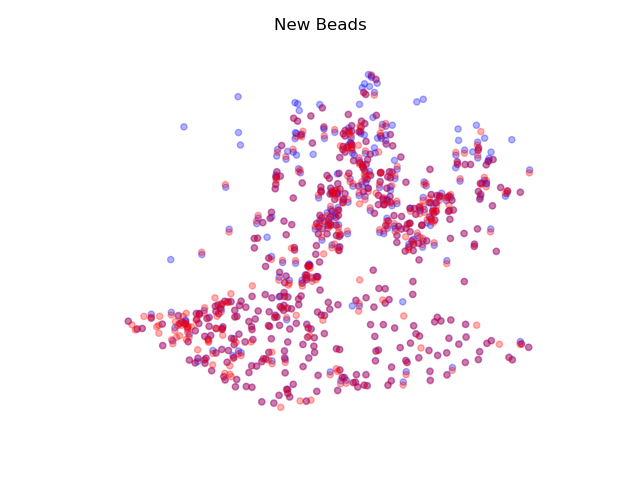

In [104]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
pos = 'Pos2'
hybe = 'hybe2'
dictionary = {}
dictionary['hybe'] = old_beads[pos][hybe]
for h in dictionary.keys():
    X, Y, Z = dictionary[h][:,0], dictionary[h][:,1], dictionary[h][:,2]
    cset = ax.scatter(X, Y, Z,alpha=0.3,c='r')
    ax.clabel(cset, fontsize=9, inline=1)
dictionary['hybe'] = new_beads[pos][hybe]
for h in dictionary.keys():
    X, Y, Z = dictionary[h][:,1], dictionary[h][:,0], dictionary[h][:,2]
    cset = ax.scatter(X, Y, Z,alpha=0.3,c='b')
    ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('New Beads')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


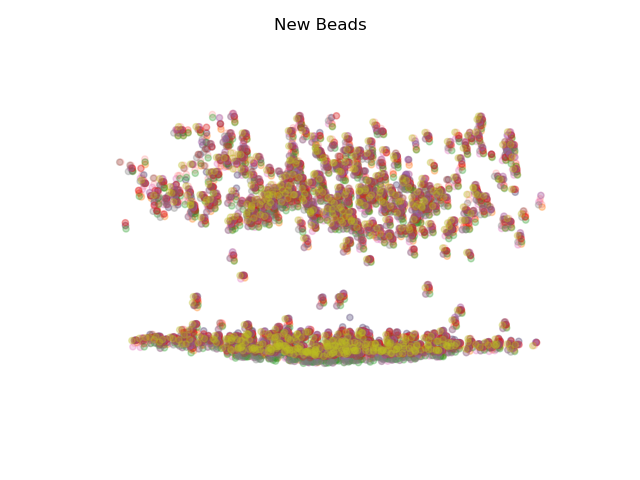

In [124]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
pos = 'Pos8'
hybe = 'hybe2'
# dictionary = old_beads[pos]
# for h in dictionary.keys():
#     X, Y, Z = dictionary[h][:,0], dictionary[h][:,1], dictionary[h][:,2]
#     cset = ax.scatter(X, Y, Z,alpha=0.3)
#     ax.clabel(cset, fontsize=9, inline=1)
dictionary = new_beads[pos]
tforms = new_tforms['good'][pos]
for h in dictionary.keys():
    X, Y, Z = dictionary[h][:,1]-tforms[h][0][0], dictionary[h][:,0]-tforms[h][0][1], dictionary[h][:,2]-tforms[h][0][2]
    cset = ax.scatter(X, Y, Z,alpha=0.3)
    ax.clabel(cset, fontsize=9, inline=1)
for h in dictionary.keys():
    X, Y, Z = dictionary[h][:,1], dictionary[h][:,0], dictionary[h][:,2]
    cset = ax.scatter(X, Y, Z,alpha=0.1,c='r')
    ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('New Beads')
plt.axis('off')
plt.show()

In [58]:
bead_dict = {}
for pos in full_dict.keys():
    bead_dict[pos] = {}
    for hybe in full_dict[pos].keys():
        bead_df_test = full_dict[pos][hybe]
        bead_df_test = bead_df_test[(bead_df_test.size_x<2.3)]
        bead_df_test = bead_df_test[(bead_df_test.size_y<2.3)]
        bead_dict[pos][hybe] = bead_df_test[['x','y','z']].values

In [19]:
from metadata import Metadata
import datetime
from metadata import *
import trackpy
from functools import partial
import multiprocessing
from hybescope_config.microscope_config import *
from scipy import ndimage
import os
import pickle
import numpy as np
import copy
pos = 'Pos0'
hybe = 'hybe4'
start = datetime.datetime.now()
md = Metadata('/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17')
temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
temp_max = temp_stk.max()
temp_min = temp_stk.min()
temp_stk = (temp_stk-temp_min)/(temp_max-temp_min)
for y, x in hot_pixels:
    temp_stk[y, x,:] = 0;
stk = np.swapaxes(np.swapaxes(temp_stk,1,2),0,1)

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif

In [ ]:
start = datetime.datetime.now()
bead_df_temp = trackpy.locate(stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
end = datetime.datetime.now()
print('\n','Started at',start)
print('\n','Ended at',end)

In [3]:
start = datetime.datetime.now()
stk = np.swapaxes(np.swapaxes(temp_stk,1,2),0,1)
bead_df_temp = trackpy.locate(stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
end = datetime.datetime.now()
print('\n','Started at',start)
print('\n','Ended at',end)


 Started at 2018-10-09 14:47:45.023847

 Ended at 2018-10-09 14:50:24.068530


In [4]:
start = datetime.datetime.now()
stk = np.swapaxes(np.swapaxes(thresh_stk,1,2),0,1)
bead_df_thresh = trackpy.locate(stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
end = datetime.datetime.now()
print('\n','Started at',start)
print('\n','Ended at',end)


 Started at 2018-10-09 14:50:24.079950

 Ended at 2018-10-09 14:52:01.836730


<IPython.core.display.Javascript object>


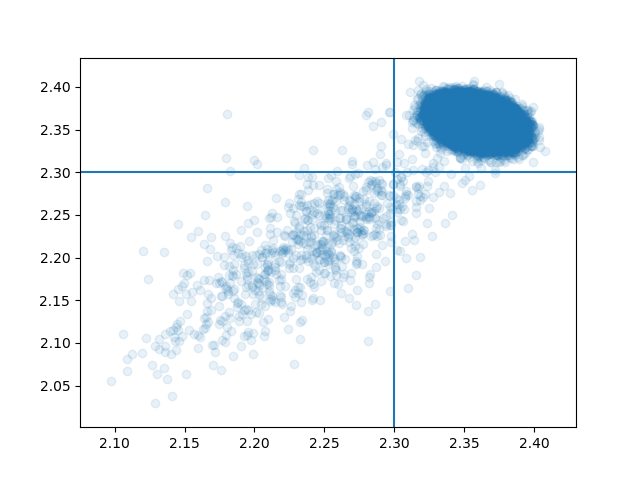

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(bead_df_temp['size_x'],bead_df_temp['size_y'],alpha=0.1)
plt.axvline(2.3)
plt.axhline(2.3)

In [37]:
bead_df_test = bead_df_temp
bead_df_test = bead_df_test[(bead_df_test.size_x<2.3)]
bead_df_test = bead_df_test[(bead_df_test.size_y<2.3)]

<IPython.core.display.Javascript object>


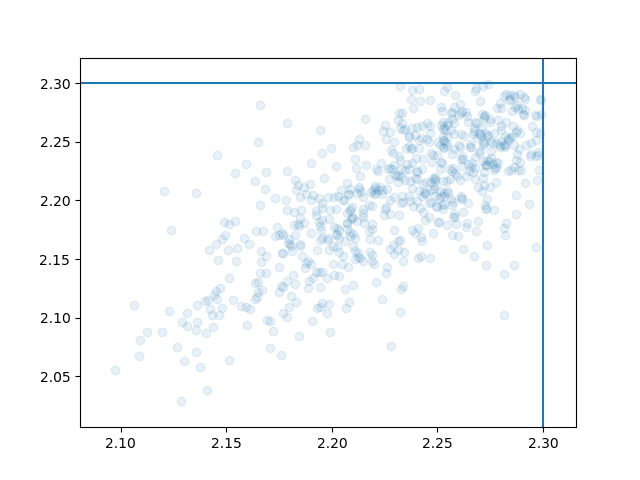

In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(bead_df_test['size_x'],bead_df_test['size_y'],alpha=0.1)
plt.axvline(2.3)
plt.axhline(2.3)

<IPython.core.display.Javascript object>


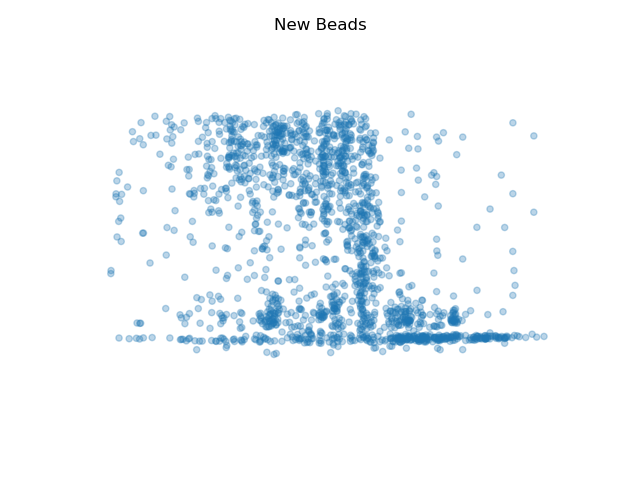

In [43]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
dictionary = {}
#dictionary['test'] = bead_df_test
dictionary['thresh'] = bead_df_thresh
for h in dictionary.keys():
    X, Y, Z = dictionary[h]['x'], dictionary[h]['y'], dictionary[h]['z']
    cset = ax.scatter(X, Y, Z,alpha=0.3)
    ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('New Beads')
plt.axis('off')
plt.show()

In [ ]:
import datetime
from metadata import *
import trackpy
from functools import partial
import multiprocessing
from hybescope_config.microscope_config import *
from scipy import ndimage
import os
import pickle
import numpy as np
import copy

def new_find_beads(out_path,md,pos,hybe):
    if os.path.exists(os.path.join(out_path,pos,hybe,'bead.pkl')):
        bead_df = pickle.load(open(os.path.join(out_path,pos,hybe,'bead.pkl'),'rb'))
    else:
        start = datetime.datetime.now()
        temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
        temp_max = temp_stk.max()
        temp_min = temp_stk.min()
        temp_stk = (temp_stk-temp_min)/(temp_max-temp_min)
        for y, x in hot_pixels:
            temp_stk[y, x,:] = 0;
#         proj = np.max(temp_stk,axis=2)
#         thresh_stk = copy.copy(temp_stk)
#         thresh = np.percentile(proj,70)
#         thresh_stk[thresh_stk<thresh]=0
        thresh_stk = ndimage.gaussian_filter(temp_stk,1) 
        bead_df = trackpy.locate(thresh_stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
        end = datetime.datetime.now()
        if not os.path.exists(out_path):
            print('out path doesnt exist')
        if not os.path.exists(os.path.join(out_path,pos)):
            os.mkdir(os.path.join(out_path,pos))
        if not os.path.exists(os.path.join(out_path,pos,hybe)):
            os.mkdir(os.path.join(out_path,pos,hybe))
        pickle.dump(bead_df, open(os.path.join(out_path,pos,hybe,'bead.pkl'),'wb'))
        print('\n','Started',pos,hybe,'at',start)
        print('\n','Ended',pos,hybe,'at',end)
    return bead_df,pos,hybe
pos = 'Pos1'
hybe = 'hybe1'
md = Metadata('/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17')
out_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17'
bead_df,pos,hybe = new_find_beads(out_path,md,pos,hybe)

In [7]:
import pickle
import os
test = {}
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/bead_testing'
pos = 'Pos0'
hybe = 'hybe1'
if not os.path.exists(os.path.join(path,pos,hybe)):
    if not os.path.exists(path):
        print('path doesnt exist')
    if not os.path.exists(os.path.join(path,pos)):
        os.mkdir(os.path.join(path,pos))
    if not os.path.exists(os.path.join(path,pos,hybe)):
        os.mkdir(os.path.join(path,pos,hybe))
pickle.dump(test, open(os.path.join(path,pos,hybe,'beads.pkl'),'wb'))

In [ ]:
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/bead_testing'
md = Metadata('/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17')
posnames = md.posnames
posnames = [pos for pos in posnames if "Pos" in pos]
ncpu = 12
full_test_beads = {}
with multiprocessing.Pool(ncpu) as p:
    pfunc = partial(bead_wrapper,path,md)
    for result,pos in p.imap(pfunc,posnames):
        print(pos,'is finally done')
        full_test_beads[pos] = result
        pickle.dump(full_test_beads,open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/full_test_beads.pkl','wb'))


In [ ]:
import datetime
from metadata import *
import trackpy
from functools import partial
import multiprocessing
from hybescope_config.microscope_config import *

def new_find_beads(md,path,pos,hybe):
    start = datetime.datetime.now()
    temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    temp_stk = temp_stk/temp_stk.max()
    temp_min = temp_stk.min()
    for y, x in hot_pixels:
        temp_stk[y, x,:] = temp_min;
    bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=90,topn = 10000, preprocess=False)
    end = datetime.datetime.now()
    pickle.dump(bead_df, open(os.path.join(path,pos,hybe),'wb'))
    print('\n','Started',pos,hybe,'at',start)
    print('\n','Ended',pos,hybe,'at',end)
    return bead_df,pos,hybe
started = datetime.datetime.now()
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
posnames = md.posnames
hybe_list = md.hybenames
posnames = [pos for pos in posnames if "Pos" in pos]
started = datetime.datetime.now()
pfunc = partial(new_find_beads,md)
full_test_beads = {}
pfunc = partial(bead_wrapper,md)
ncpu = 12
test = {}
out_path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/bead_testing'
for pos in posnames:
    test[pos] = {}
    for hybe in hybe_list:
        test[pos][hybe] = new_find_beads(md,pos,hybe)
        pickle.dump(test,open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/full_test_beads.pkl','wb'))
ended = datetime.datetime.now()
print('\n','Started at',started)
print('\n','Ended at',ended)
print('\n','Total of', len(posnames),'positions completed')

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 hybe1 at 2018-09-30 23:18:04.763331

 Ended Pos0 hybe1 at 2018-09-30 23:21:38.964549
opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 hybe2 at 2018-09-30 23:21:39.288938

 Ended Pos0 hybe2 at 2018-09-30 23:24:38.227377
opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 hybe3 at 2018-09-30 23:24:38.916456

 Ended Pos0 hybe3 at 2018-09-30 23:27:37.297968
opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 hybe4 at 2018-09-30 23:27:38.124646

 Ended Pos0 hybe4 at 2018-09-30 23:30:09.848861
opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif

In [ ]:
def new_find_beads(md,pos,hybe):
    start = datetime.datetime.now()
    test_beads = {}
    for hybe in md.hybenames:
        print(hybe)
        temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
        temp_stk = temp_stk/temp_stk.max()
        temp_min = temp_stk.min()
        for y, x in hot_pixels:
            temp_stk[y, x,:] = temp_min;
        bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=90,preprocess=False)#, engine='numba')
        test_beads[hybe] = bead_df
    end = datetime.datetime.now()
    print('\n','Started',pos,'at',start)
    print('\n','Ended',pos,'at',end)
    return test_beads,pos

In [8]:
def new_find_beads(md,pos,hybe):
    start = datetime.datetime.now()
    test_beads = {}
    temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    temp_stk = temp_stk/temp_stk.max()
    temp_min = temp_stk.min()
    for y, x in hot_pixels:
        temp_stk[y, x,:] = temp_min;
    bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=90,preprocess=False, engine='numba')
    end = datetime.datetime.now()
    print('\n','Started',pos,hybe,'at',start)
    print('\n','Ended',pos,hybe,'at',end)
    return bead_df,pos,hybe

In [5]:
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
pos_bead_dict = {}
for hybe in md.hybenames:
        result,pos,hybe = new_find_beads(md,'Pos0',hybe)
        pos_bead_dict[hybe] = result

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 at 2018-09-30 17:31:10.819151

 Ended Pos0 at 2018-09-30 17:34:31.615790


<IPython.core.display.Javascript object>


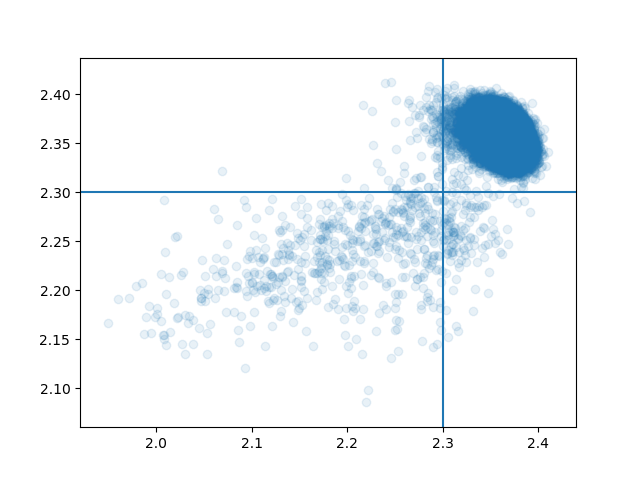

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(result['size_x'],result['size_y'],alpha=0.1)
plt.axvline(2.3)
plt.axhline(2.3)

In [9]:
# numba
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
result,pos,hybe = new_find_beads(md,'Pos0','hybe1')

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 hybe1 at 2018-09-30 17:35:28.961487

 Ended Pos0 hybe1 at 2018-09-30 17:38:48.235711


In [114]:
print('\n','Starting',datetime.datetime.now())
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
posnames = md.posnames
hybe_list = md.hybenames
posnames = [pos for pos in posnames if "Pos" in pos]
started = datetime.datetime.now()
pfunc = partial(new_find_beads,md)
full_test_beads = {}
pfunc = partial(new_find_beads,md)
ncpu = 12
with multiprocessing.Pool(ncpu) as p:
    for result,pos in p.imap(pfunc,posnames):
        full_test_beads[pos] = result
        pickle.dump(full_test_beads,open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/full_test_beads.pkl','wb'))
ended = datetime.datetime.now()
print('\n','Started at',started)
print('\n','Ended at',ended)
print('\n','Total of', len(posnames),'positions completed')
pickle.dump(full_test_beads,open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/full_test_beads.pkl','wb'))

NameError: name 'result' is not defined

In [3]:
import datetime
from metadata import *
import trackpy
from hybescope_config.microscope_config import *
def new_find_beads(md,pos):
    start = datetime.datetime.now()
    test_beads = {}
    for hybe in hybe_list:
        temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
        temp_stk = temp_stk/temp_stk.max()
        temp_min = temp_stk.min()
        for y, x in hot_pixels:
            temp_stk[y, x,:] = temp_min;
        bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=99,preprocess=False,minmass=1)
        test_beads[hybe] = bead_df#.as_matrix[:,0:3]
    end = datetime.datetime.now()
    print('\n','Started',pos,'at',start)
    print('\n','Ended',pos,'at',end)
    return test_beads,pos
hybe_list = ['hybe1', 'hybe2', 'hybe3', 'hybe4', 'hybe5', 'hybe6', 'hybe7', 'hybe8', 'hybe9']
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
posname = 'Pos0'
test_beads = {}
test_beads[posname],pos = new_find_beads(md,posname)

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 at 2018-09-28 16:59:42.597021

 Ended Pos0 at 2018-09-28 17:16:04.263657


In [9]:
import datetime
from metadata import *
import trackpy
from hybescope_config.microscope_config import *
def new_find_beads(md,pos):
    start = datetime.datetime.now()
    test_beads = {}
    for hybe in hybe_list:
        temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
        temp_stk = temp_stk/temp_stk.max()
        temp_min = temp_stk.min()
        for y, x in hot_pixels:
            temp_stk[y, x,:] = temp_min;
        temp_stk = np.swapaxes(np.swapaxes(temp_stk,0,2),1,2)
        bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=99,preprocess=False,minmass=1,engine='numba')
        test_beads[hybe] = bead_df
    end = datetime.datetime.now()
    print('\n','Started',pos,'at',start)
    print('\n','Ended',pos,'at',end)
    return test_beads,pos
hybe_list = ['hybe1', 'hybe2', 'hybe3', 'hybe4', 'hybe5', 'hybe6', 'hybe7', 'hybe8', 'hybe9']
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
posname = 'Pos0'
test_beads = {}
test_beads[posname],pos = new_find_beads(md,posname)

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 at 2018-09-28 17:19:00.952035

 Ended Pos0 at 2018-09-28 17:35:06.151691


In [105]:
import datetime
from metadata import *
import trackpy
from hybescope_config.microscope_config import *
start = datetime.datetime.now()
test_beads = {}
hybe = 'hybe1'
path = '/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/'
md = Metadata(path)
posnames = ['Pos0','Pos15']#,'Pos30','Pos20','Pos10']
test = {}
for posname in posnames:
    start = datetime.datetime.now()
    temp_stk = md.stkread(Channel='DeepBlue',Position=posname, hybe=hybe)
    temp_stk = temp_stk/temp_stk.max()
    temp_min = temp_stk.min()
    for y, x in hot_pixels:
        temp_stk[y, x,:] = temp_min;
    temp_stk = np.swapaxes(np.swapaxes(temp_stk,0,2),1,2)
    bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=90,preprocess=False, engine='numba')
    test[posname] = bead_df
    end = datetime.datetime.now()
    print('\n','Started',posname,'at',start)
    print('\n','Ended',posname,'at',end)

opening img_Pos0_000000081_000000000_DeepBlue_000_081.tif
 Started Pos0 at 2018-09-28 19:32:06.241783

 Ended Pos0 at 2018-09-28 19:35:21.345982
opening img_Pos15_000000081_000000000_DeepBlue_000_081.tif
 Started Pos15 at 2018-09-28 19:35:21.347034

 Ended Pos15 at 2018-09-28 19:38:02.060153


<IPython.core.display.Javascript object>


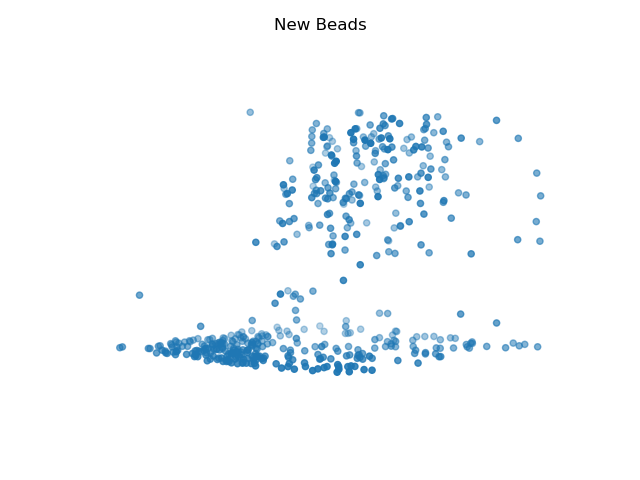

In [39]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
dictionary = test_beads
for h in dictionary.keys():
    X, Y, Z = dictionary[h]['x'], dictionary[h]['y'], dictionary[h]['z']
    cset = ax.scatter(X, Y, Z)
    ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('New Beads')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


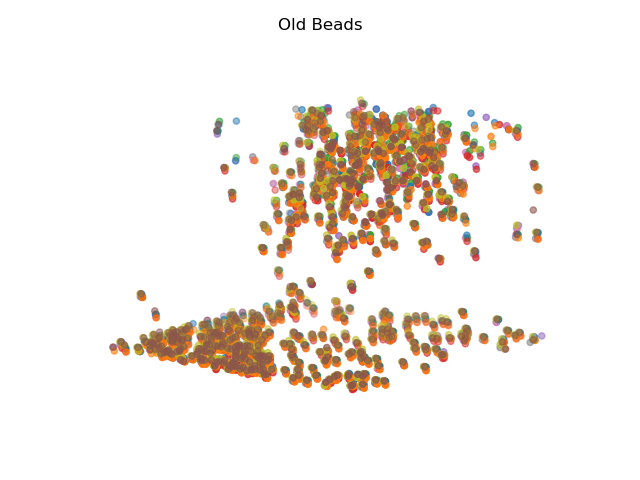

In [41]:
old_beads = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/results/beads.pkl','rb'))
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
dictionary = old_beads[posname]
for h in dictionary.keys():
    X, Y, Z = dictionary[h][:,0], dictionary[h][:,1], dictionary[h][:,2]
    cset = ax.scatter(X, Y, Z)
    ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('Old Beads')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


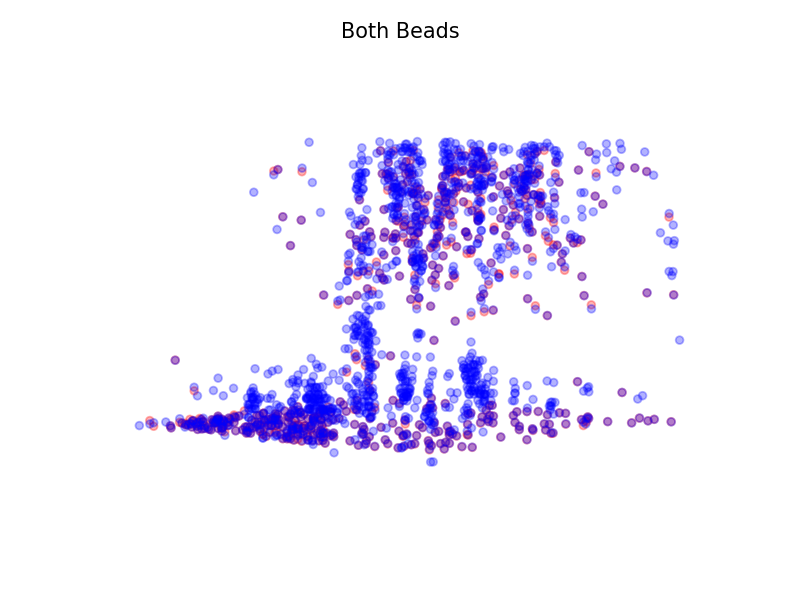

In [50]:
old_beads = pickle.load(open('/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/results/beads.pkl','rb'))
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
hybe = 'hybe1'
dictionary = old_beads[posname]
dictionary2 = test_beads
for h in dictionary2.keys():
    if h == hybe:
        X, Y, Z = dictionary[h][:,1], dictionary[h][:,0], dictionary[h][:,2]
        cset = ax.scatter(X, Y, Z,c='r',alpha=0.3)
        ax.clabel(cset, fontsize=9, inline=1)
        X, Y, Z = dictionary2[h]['x'], dictionary2[h]['y'], dictionary2[h]['z']
        cset = ax.scatter(X, Y, Z,c='b',alpha=0.3)
        ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('Both Beads')
plt.axis('off')
plt.show()

In [112]:
%matplotlib notebook
#for posname in full_test_beads.keys():
posname='Pos1'
for hybe in full_test_beads[posname].keys():
    plt.scatter(full_test_beads[posname][hybe]['size_x'],full_test_beads[posname][hybe]['size_y'],alpha=0.1)
plt.axvline(2.3)
plt.axhline(2.3)

KeyError: 'Pos1'

In [ ]:
%matplotlib notebook
for posname in full_test_beads.keys():
    for hybe in full_test_beads[posname].keys():
        plt.scatter(full_test_beads[posname][hybe]['size_x'],full_test_beads[posname][hybe]['size_y'],alpha=0.1)
plt.axvline(2.3)
plt.axhline(2.3)

<IPython.core.display.Javascript object>


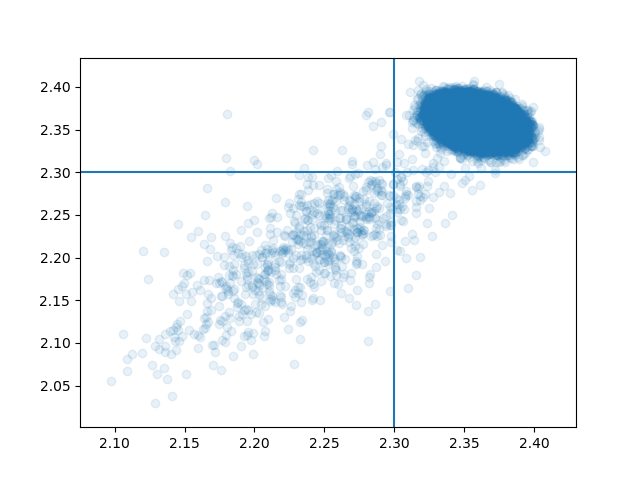

In [101]:
%matplotlib notebook
plt.scatter(bead_df['size_x'],bead_df['size_y'],alpha=0.1)
plt.axvline(2.3)
plt.axhline(2.3)

In [ ]:
import datetime
from metadata import *
import trackpy
from functools import partial
import multiprocessing
from hybescope_config.microscope_config import *
import os
import pickle

def new_find_beads(path,md,pos,hybe):
    if os.path.exists(os.path.join(path,pos,hybe,'bead.pkl')):
        print(pos, hybe, 'is already done!')
    else:
        start = datetime.datetime.now()
        temp_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
        temp_max = temp_stk.max()
        temp_min = temp_stk.min()
        temp_stk = (temp_stk-temp_min)/(temp_max-temp_min)
        for y, x in hot_pixels:
            temp_stk[y, x,:] = 0;
        temp_stk = np.swapaxes(np.swapaxes(temp_stk,1,2),0,1)
        bead_df = trackpy.locate(temp_stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
        end = datetime.datetime.now()
        if not os.path.exists(path):
            print('path doesnt exist')
        if not os.path.exists(os.path.join(path,pos)):
            os.mkdir(os.path.join(path,pos))
        if not os.path.exists(os.path.join(path,pos,hybe)):
            os.mkdir(os.path.join(path,pos,hybe))
        pickle.dump(bead_df, open(os.path.join(path,pos,hybe,'bead.pkl'),'wb'))
        print('\n','Started',pos,hybe,'at',start)
        print('\n','Ended',pos,hybe,'at',end)
        del temp_stk
        del bead_df
    return pos,hybe

def bead_wrapper(path,md,pos):
    for hybe in md.hybenames:
        pos,hybe = new_find_beads(path,md,pos,hybe)
    return pos
path = '/hybedata/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17/new_bead_finder'
md = Metadata()
posnames = md.posnames'/mnt/HypeScope/Zach/FISH_Troubleshooting/Transverse_Wound_First_2018Sep17'
posnames = [pos for pos in posnames if "Pos" in pos]
ncpu = 12
full_test_beads = {}
os.environ['MKL_NUM_THREADS'] = '3'
os.environ['GOTO_NUM_THREADS'] = '3'
os.environ['OMP_NUM_THREADS'] = '3'
with multiprocessing.Pool(ncpu) as p:
    pfunc = partial(bead_wrapper,path,md)
    for pos in p.imap(pfunc,posnames):
        print('\n',pos, 'finished')

In [5]:
# Stack to play with 
from metadata import Metadata
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(path)
pos = '3-Pos_008_005'
hybe = 'hybe1'
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import trackpy
from hybescope_config.microscope_config import *
pos = '3-Pos_008_005'
hybe = 'hybe1'
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
temp_max = teststk.max()
temp_min = teststk.min()
teststk = (teststk-temp_min)/(temp_max-temp_min)
for y, x in hot_pixels:
    teststk[y, x,:] = 0;
teststk = np.swapaxes(np.swapaxes(teststk,1,2),0,1)
bead_df = trackpy.locate(teststk,(5,7,7),percentile=90, preprocess=False,engine='numba')

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

KeyboardInterrupt: 

In [ ]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
tempdf = bead_df[bead_df.size_x<2.3]
tempdf = tempdf[tempdf.size_y<2.3]
dictionary = tempdf
for h in dictionary.keys():
    X, Y, Z = dictionary.x, dictionary.y, dictionary.z
    cset = ax.scatter(X, Y, Z,alpha=0.3,c='b')
    ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


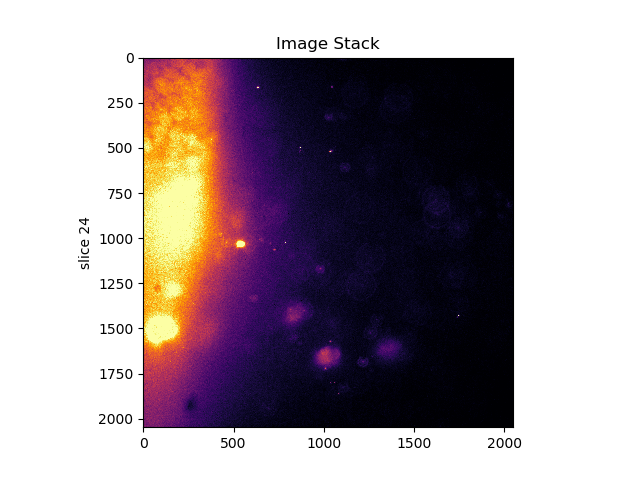

In [73]:
%matplotlib notebook
from pyvis import stkshow
# test = teststk>np.percentile(teststk.ravel(),99.99)
stkshow(teststk2)

In [ ]:
%matplotlib notebook
from pyvis import stkshow
plt.imshow(np.log(np.abs(np.fft.fftshift(test[:,:,50])**2)))
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [7]:
import cv2
from cv2_rolling_ball import subtract_background_rolling_ball

img = teststk[:,:,3]
img, background = subtract_background_rolling_ball(img, 10, light_background=False,
                                     use_paraboloid=False, do_presmooth=True)

KeyboardInterrupt: 

100  number of beads found


<IPython.core.display.Javascript object>


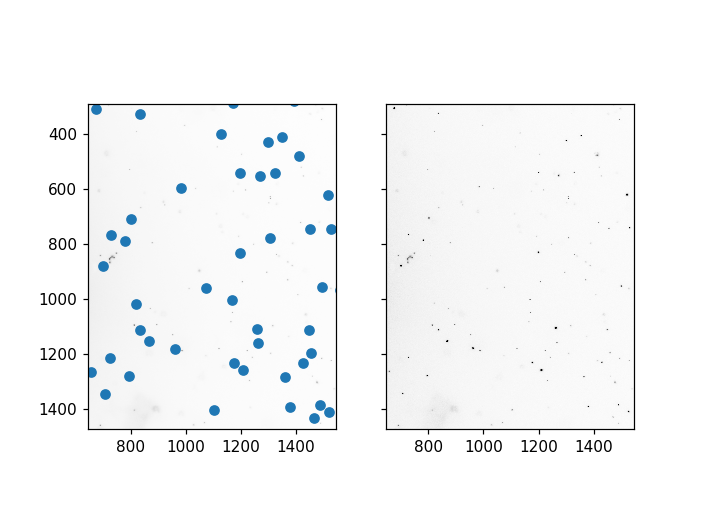

In [193]:
from skimage.feature import peak_local_max
from scipy.ndimage.filters import gaussian_filter
z = 5
img = gaussian_filter(teststk[:,:,z],1)
out = peak_local_max(img,threshold_rel = 0.5,min_distance=10)
print(len(out),' number of beads found')
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].scatter(out[:,1],out[:,0])
ax[0].imshow(img,cmap='Greys')
ax[1].imshow(teststk[:,:,z],cmap='Greys')
plt.show()

In [199]:
from skimage.feature import peak_local_max
from scipy.ndimage.filters import gaussian_filter
stk = gaussian_filter(teststk,5)
out = peak_local_max(stk,threshold_rel = 0.6,min_distance=20)
print(len(out),' number of beads found')

756  number of beads found


<IPython.core.display.Javascript object>


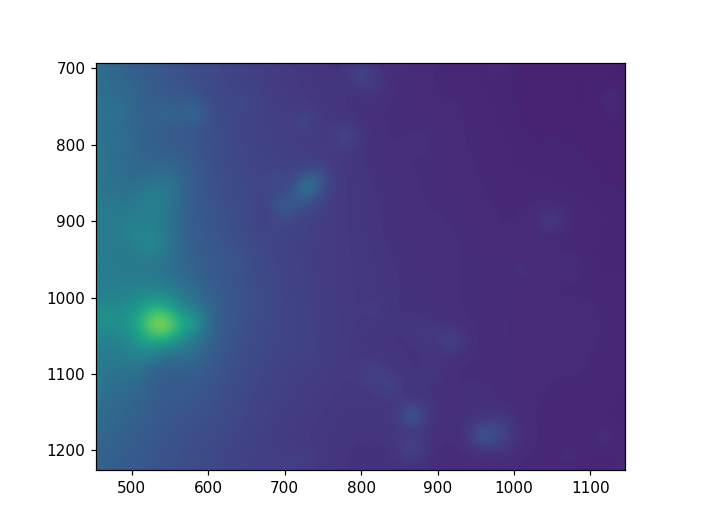

In [198]:
%matplotlib notebook
plt.imshow(stk[:,:,5])

<IPython.core.display.Javascript object>


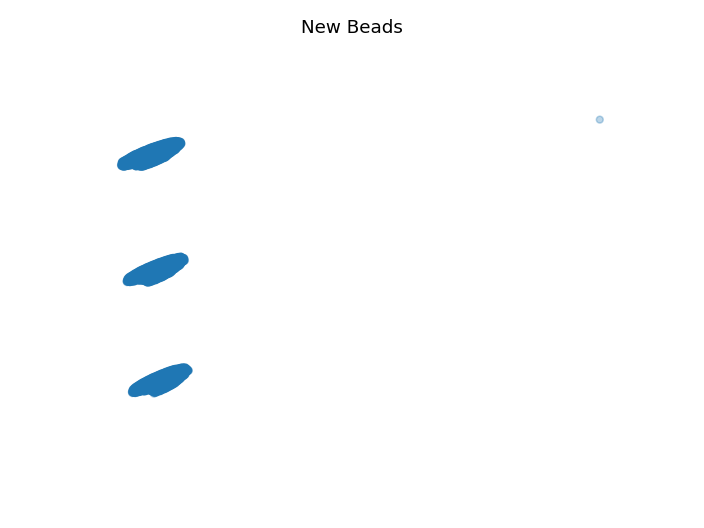

In [196]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X, Y, Z = out[:,1],out[:,0],out[:,2]
cset = ax.scatter(X, Y, Z,alpha=0.3)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.title('New Beads')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


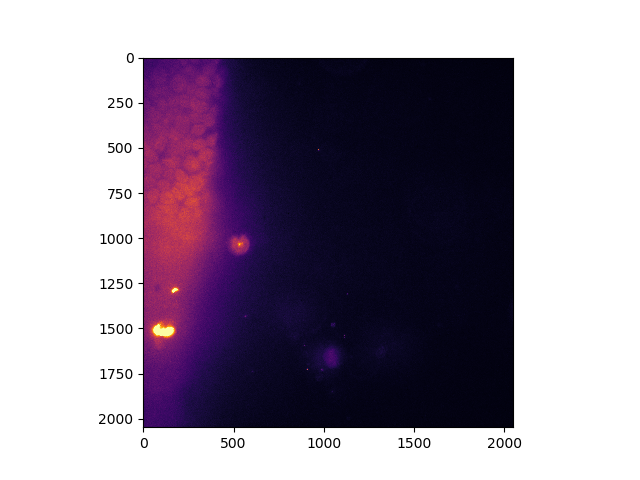

In [22]:
% matplotlib notebook
import matplotlib.pyplot as plt
plt.imshow(img,cmap='inferno')
plt.show()

<IPython.core.display.Javascript object>


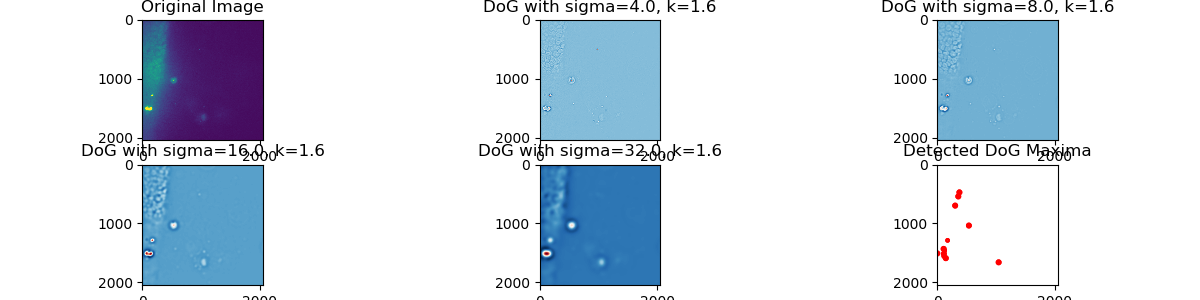

In [33]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = teststk[:,:,40]

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [135]:
def convolve(I,k):
    k=k+1
    [N,M,L] = I.shape
    k1 = 2**(k - 1)
    k2 = 2**k
    # Convolve the columns
    tmp = np.pad(I,((k2,0),(0,0),(0,0)),'edge')
    [X,Y,Z] = tmp.shape
    I = 6*tmp[k2+1:X-k2,:,:] + 4*(tmp[k2+k1+1:X-k2+k1,:,:] + tmp[k2-k1+1:X-k2-k1,:,:]) + tmp[2*k2+1:X,:,:] + tmp[1:X-2*k2,:,:]
    # Convolve the rows
    tmp = np.pad(I*0.625,((0,0),(k2,0),(0,0)),'edge')
    I = 6*tmp[:,k2+1:Y-k2,:] + 4*(tmp[:,k2+k1+1:Y-k2+k1,:] + tmp[:,k2-k1+1:Y-k2-k1,:]) + tmp[:,2*k2+1:Y,:] + tmp[:,1:Y-2*k2,:]
        # Convolve the stacks
    tmp = np.pad(I*0.625,((0,0),(0,0),(k2,0)),'edge')
    I = 6*tmp[:,:,k2+1:Z-k2] + 4*(tmp[:,:,k2+k1+1:Z-k2+k1] + tmp[:,:,k2-k1+1:Z-k2-k1]) + tmp[:,:,2*k2+1:Z] + tmp[:,:,1:Z-2*k2]
    F = I*0.625
    return F
    

In [136]:
#AWT3D
I = teststk
[N,M,L] = I.shape
K = int(np.max([np.log2(N),np.log2(M),np.log2(L)]))
nBands = K;
W = np.zeros((N, M, L, nBands + 1));
lastA = I
for k in range(0,nBands):
    newA = convolve(lastA,k)
    W[:,:,:,k] = lastA-newA
    lastA = newA
W[:,:,:,nbands+1] = lastA

ValueError: operands could not be broadcast together with shapes (2048,2048,103) (2045,2043,98) 

<IPython.core.display.Javascript object>


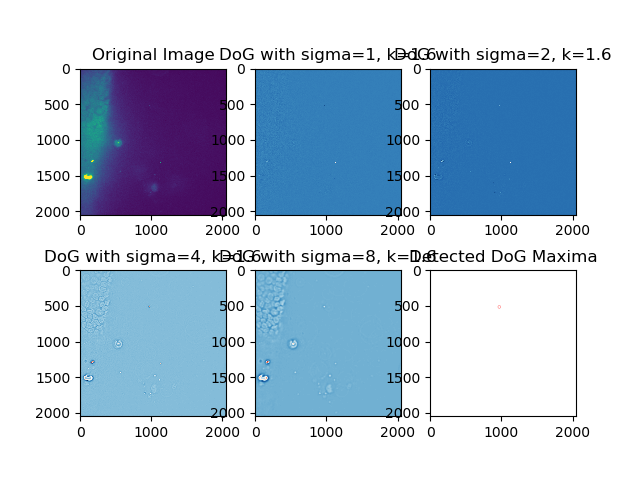

-0.22764767473400505 0.04249222156622817
-0.22299473092839195 0.03179559439217483
-0.10118755309206517 0.04002167308462301
-0.1493182671831197 0.05252632071167884


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [146]:
from skimage.filters import gaussian
from skimage import data, feature, color, img_as_float
from matplotlib import pyplot as plt
%matplotlib notebook
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
img = teststk[:,:,40]

k = 1.6

plt.subplot(2,3,1)
plt.imshow(img)
plt.title('Original Image')

for idx,sigma in enumerate([1,2,4,8]):
    s1 = gaussian(img,k*sigma)
    s2 = gaussian(img,sigma)

    # multiply by sigma to get scale invariance
    dog = s1 - s2
    plt.subplot(2,3,idx+2)
    print(dog.min(),dog.max())
    plt.imshow(dog,cmap='RdBu')
    plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

ax = plt.subplot(2,3,6)
blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_log(img, min_sigma=1, max_sigma=8,threshold=0.5,overlap=1.0)]
# skimage has a bug in my version where only maxima were returned by the above
blobs_dog += [(x[0],x[1],x[2]) for x in feature.blob_log(-img, min_sigma=1, max_sigma=8,threshold=0.5,overlap=1.0)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.imshow(img_blobs)
plt.title('Detected DoG Maxima')

plt.show()

In [153]:
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
dog = teststk
for i in range(teststk.shape[2]):
    img = teststk[:,:,i]
    k = 1.6
    sigma = 1
    s1 = gaussian(img,k*sigma)
    s2 = gaussian(img,sigma)
    dog[:,:,i] = s1 - s2


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<IPython.core.display.Javascript object>


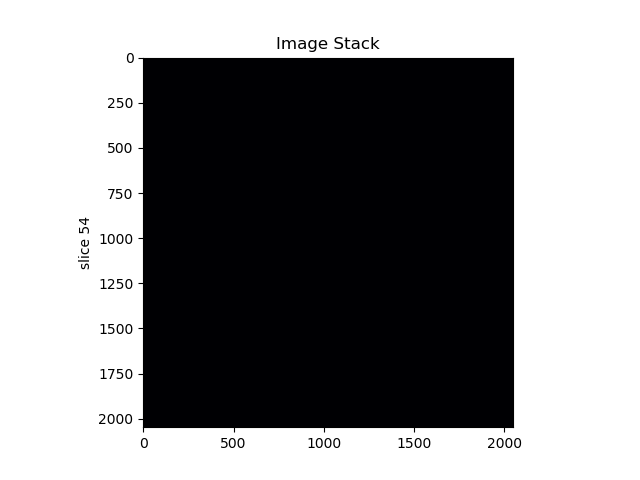

In [155]:
%matplotlib notebook
from pyvis import stkshow
stkshow(dog)

In [164]:
from scipy.ndimage.filters import gaussian_filter
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
stack = teststk
sigma = 2
k =1.6
S1 = gaussian_filter(stack,k*sigma)
S2 = gaussian_filter(stack,sigma)
DOG = S1-S2

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

<IPython.core.display.Javascript object>


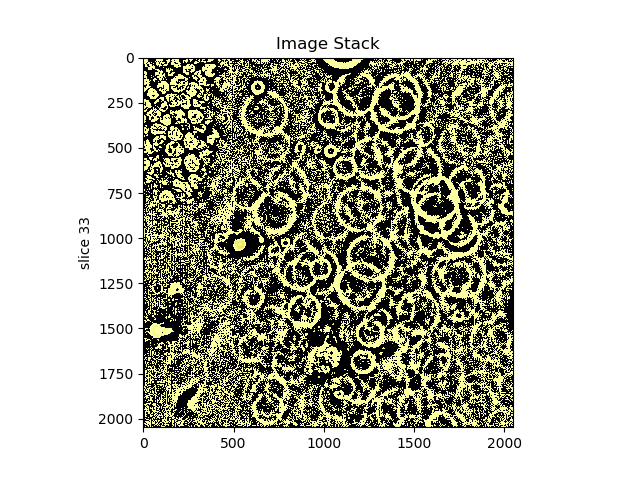

In [165]:
%matplotlib notebook
from pyvis import stkshow
stkshow(DOG)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

<IPython.core.display.Javascript object>


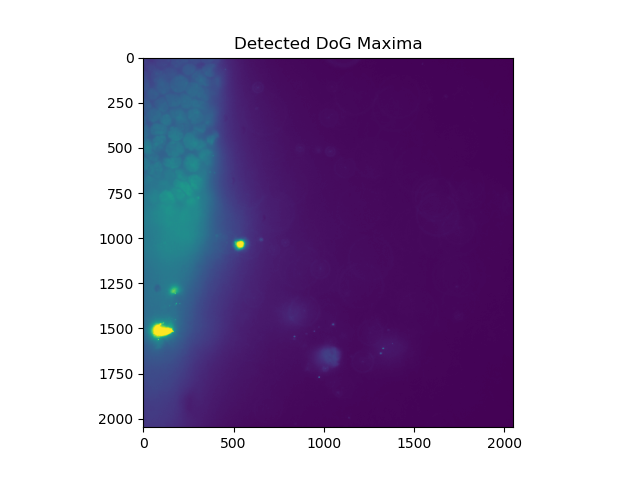

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [168]:
%matplotlib notebook
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
img = teststk[:,:,40]
blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_log(img, min_sigma=1, max_sigma=16,threshold=0.5,overlap=1.0)]
# skimage has a bug in my version where only maxima were returned by the above
blobs_dog += [(x[0],x[1],x[2]) for x in feature.blob_log(-img, min_sigma=1, max_sigma=16,threshold=0.5,overlap=1.0)]

#remove duplicates
blobs_dog = set(blobs_dog)

img_blobs = color.gray2rgb(img)
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)
plt.imshow(img_blobs)
plt.title('Detected DoG Maxima')

plt.show()

In [167]:
from scipy.ndimage.filters import gaussian_filter
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
stack = teststk
sigma = 2
k =1.6
S1 = gaussian_filter(stack,k*sigma)
S2 = gaussian_filter(stack,sigma)
DOG = S1-S2

{(514.0, 971.0, 1.7777777777777777)}

In [185]:
img = teststk[:,:,i]
img = (img-img.min())/((img-img.min()).max())

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

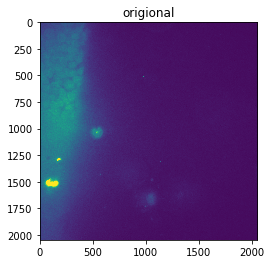

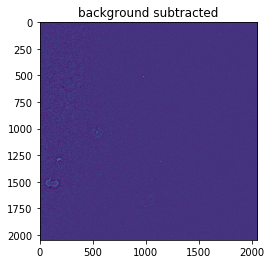

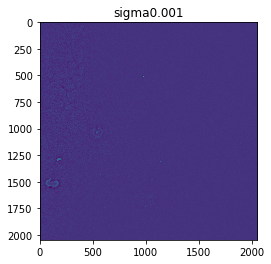

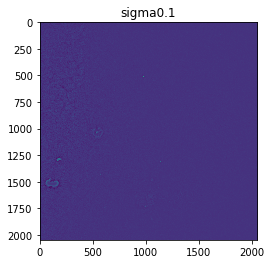

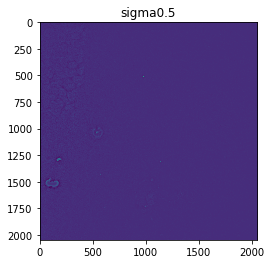

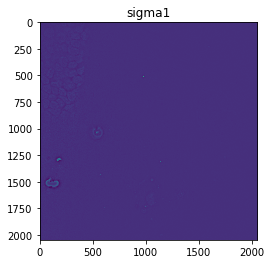

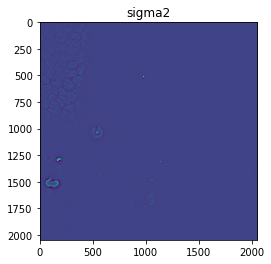

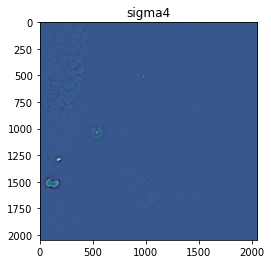

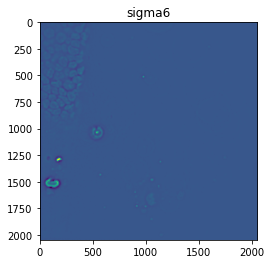

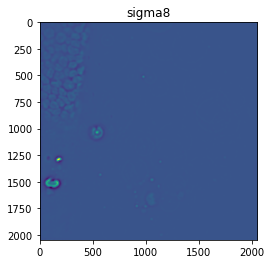

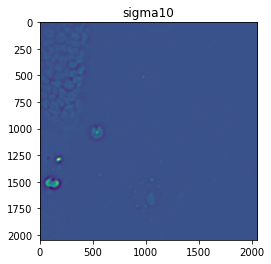

In [191]:
%matplotlib inline
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
dog = teststk
img = teststk[:,:,40]
img = (img-img.min())/((img-img.min()).max())
plt.title('origional')
plt.imshow(img)
plt.show()
img_nb = img-gaussian(img,10)
plt.title('background subtracted')
plt.imshow(img_nb)
plt.show()
for i in [0.001,0.1,0.5,1,2,4,6,8,10]:
    plt.title('sigma'+str(i))
    plt.imshow(gaussian(img_nb,i))
    plt.show()

In [58]:
from skimage.filters import gaussian
from skimage.feature import peak_local_max
import datetime
new_bead_dict = {}
new_bead_dict[pos] = {}
for hybe in md.hybenames:
    start = datetime.datetime.now()
    teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    dog = teststk.astype('float64')
    dog = (dog-dog.min())/((dog-dog.min()).max())
    for i in range(teststk.shape[2]):
        img = dog[:,:,i]
        dog[:,:,i] = img - gaussian(img,10)
    new_bead_dict[pos][hybe] = peak_local_max(dog, threshold_abs=0.65)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe8
started at 2018-12-11 17:31:19.645857
ended at 2018-12-11 17:33:59.112304
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe7
started at 2018-12-11 17:33:59.112925
ended at 2018-12-11 17:36:41.188617
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe9
started at 2018-12-11 17:36:41.189257
ended at 2018-12-11 17:39:24.755924
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe5
started at 2018-12-11 17:39:24.756608
ended at 2018-12-11 17:41:52.187225
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe4
started at 2018-12-11 17:41:52.187839
ended at 2018-12-11 17:44:24.300364
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe3
started at 2018-12-11 17:44:24.303259
ended at 2018-12-11 17:46:54.282668
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe1
started at 2018-12-11 17:46:54.284260


<IPython.core.display.Javascript object>


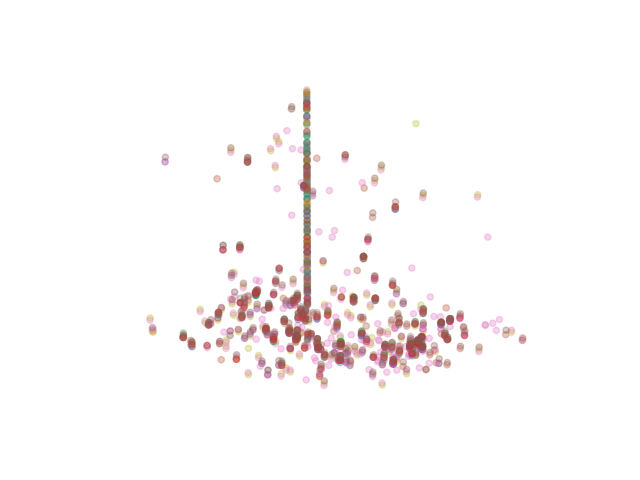

In [59]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
pos = '3-Pos_008_005'
hybe = 'hybe1'
for hybe in new_bead_dict[pos].keys():
    coord = new_bead_dict[pos][hybe]
    X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
    cset = ax.scatter(X, Y, Z,alpha=0.3)
    ax.clabel(cset, fontsize=9, inline=1)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.axis('off')
plt.show()

In [48]:
saved_bead_dict = new_bead_dict

In [52]:
from scipy.ndimage.filters import gaussian_filter
from skimage.feature import peak_local_max
import datetime
new_bead_dict = {}
new_bead_dict[pos] = {}
for hybe in ['hybe1']:#md.hybenames:
    start = datetime.datetime.now()
    teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    dog = teststk.astype('float64')
    dog = (dog-dog.min())/((dog-dog.min()).max())
    dog = dog-gaussian_filter(dog,10)
#     for i in range(teststk.shape[2]):
#         img = teststk[:,:,i].copy()
#         img = (img-img.min())/((img-img.min()).max())
#         dog[:,:,i] = img - gaussian(img,10)
    new_bead_dict[pos][hybe] = peak_local_max(dog, threshold_abs=0.65)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tifhybe1
started at 2018-12-11 17:21:05.464315
ended at 2018-12-11 17:24:17.775120


In [54]:
len(new_bead_dict[pos][hybe])

405

In [252]:
dictionary = bead_df[pos][hybe]
coord = np.zeros((len(dictionary),3))
for i in range(0,len(dictionary)):
    coord[i,0] = dictionary[i][0]
    coord[i,1] = dictionary[i][1]
    coord[i,2] = dictionary[i][2]

<IPython.core.display.Javascript object>


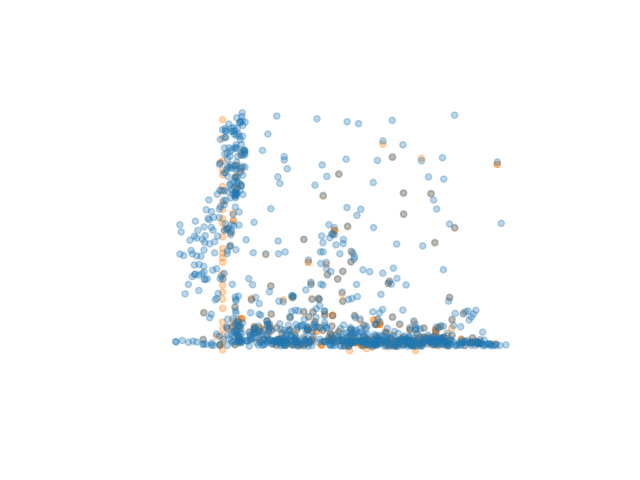

In [60]:
%matplotlib notebook
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
pos = '3-Pos_008_005'
hybe = 'hybe1'
ref_beads = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/new_beads.pkl','rb'))
bead_df = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/beads.pkl','rb'))
dictionary = bead_df[pos][hybe]
coord = np.zeros((len(dictionary),3))
for i in range(0,len(dictionary)):
    coord[i,0] = dictionary[i][0]
    coord[i,1] = dictionary[i][1]
    coord[i,2] = dictionary[i][2]
X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
cset = ax.scatter(X, Y, Z,alpha=0.3)
ax.clabel(cset, fontsize=9, inline=1)
X, Y, Z = ref_beads[:,0], ref_beads[:,1], ref_beads[:,2]
cset = ax.scatter(X, Y, Z,alpha=0.3)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
plt.axis('off')
plt.show()

In [1]:
from metadata import Metadata
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(path)
pos = '3-Pos_008_005'
hybe = 'hybe1'
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
ref_beads = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/new_beads.pkl','rb'))
bead_df = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/beads.pkl','rb'))


opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

In [3]:
import numpy as np
i = 40
beads = bead_df[pos][hybe]
bead_coord = np.zeros((len(beads),3))
for i in range(0,len(beads)):
    bead_coord[i,0] = beads[i][0]
    bead_coord[i,1] = beads[i][1]
    bead_coord[i,2] = int(beads[i][2])
bead_coord[bead_coord[:,2]==4]
# plt.scatter(bead_coord[:,0],bead_coord[:,1],bead_coord[:,2],'b')
# plt.scatter(ref_beads[:,0],ref_beads[:,1],ref_beads[:,2],'o')


array([[2032.4, 1554. ,   60. ],
       [2031.4, 1229.6,    4. ],
       [2028.4,  915.4,    5. ],
       ...,
       [  19.6, 1337.4,    7. ],
       [  15.6,  507.2,   46. ],
       [  16. ,  490.8,   53. ]])

<IPython.core.display.Javascript object>


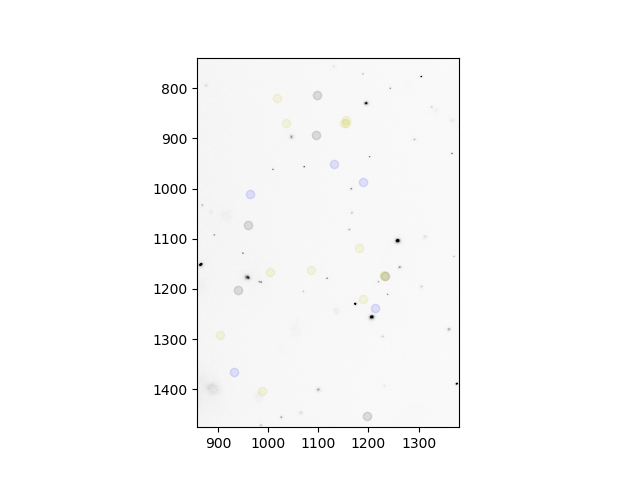

In [61]:
%matplotlib notebook
import matplotlib.pyplot as plt
i = 5
old_beads = bead_coord[bead_coord[:,2]==i]
if len(old_beads>0):
    plt.scatter(old_beads[:,0],old_beads[:,1],c='b',alpha = 0.1)
new_beads = ref_beads[ref_beads[:,2]==i]
if len(new_beads>0):
    plt.scatter(new_beads[:,0],new_beads[:,1],c='y',alpha = 0.1)
plt.imshow(teststk[:,:,i],cmap='Greys')
plt.show()


In [2]:
from metadata import Metadata
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(path)
pos = '3-Pos_008_005'
hybe = 'hybe1'
teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)


opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

In [169]:
import pywt
import numpy as np
import datetime
wavelet = 'db1'
start = datetime.datetime.now()
result = teststk.astype('float64')
for z in range(teststk.shape[2]):
    img = teststk[:,:,z].copy()
    img_mmin = img-img.min()
    img = (img_mmin)/(img_mmin.max())
    coeffs = pywt.wavedec2(img,wavelet)
    keep_list = [2,3,4]
    for i in range(1,len(coeffs)+1):
        if i in keep_list:
            continue
        coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
    result[:,:,z] = pywt.waverec2(coeffs,wavelet)
beads = peak_local_max(result,threshold_abs=0.3)
print(1,len(beads))
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)
# %matplotlib notebook
# plt.scatter(beads[:,0],beads[:,1])
# plt.imshow(result,cmap='Greys')
# plt.show()

1 5468

 hybe1
started at 2018-12-11 19:19:29.999770
ended at 2018-12-11 19:21:30.637818



 hybe1
started at 2018-12-11 19:58:15.164304
ended at 2018-12-11 19:58:19.151807


<IPython.core.display.Javascript object>


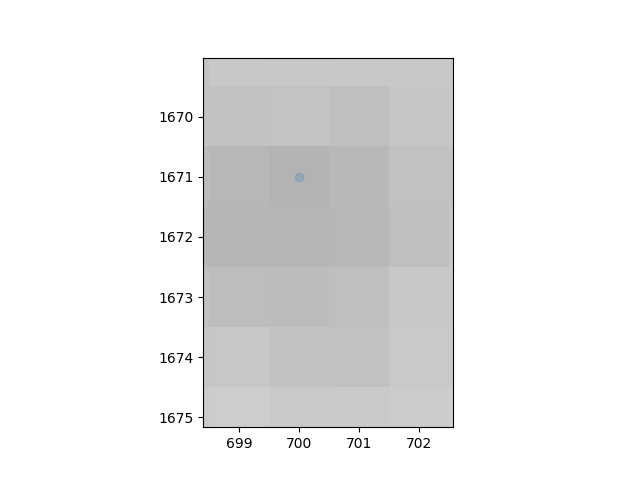

In [200]:
import pywt
import numpy as np
import datetime
wavelet = 'db2'
start = datetime.datetime.now()
result = teststk.astype('float64')
for z in [20]:#range(teststk.shape[2]):
    img = teststk[:,:,z].copy()
    #img_mmin = img-img.min()
    #img = (img_mmin)/(img_mmin.max())
    coeffs = pywt.wavedec2(img,wavelet, level=2)
    keep_list = [1, 2]
    for i in range(1,len(coeffs)+1):
        if i in keep_list:
            continue
        coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
    Results = pywt.waverec2(coeffs,wavelet)
    #result[:,:,z] = pywt.waverec2(coeffs,wavelet)
beads2 = peak_local_max(Results,threshold_rel=0.1)
#print(1,len(beads))
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)
%matplotlib notebook
plt.scatter(beads2[:,1],beads2[:,0], alpha=0.2)
plt.imshow(Results,cmap='Greys')
plt.show()

In [20]:
import pywt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
wavelet = 'db2'
start = datetime.datetime.now()
result = teststk.astype('float64')
for z in range(teststk.shape[2]):
    img = teststk[:,:,z].copy()
    img_mmin = img-img.min()
    img = (img_mmin)/(np.percentile(img_mmin.ravel(),99))
    coeffs = pywt.wavedec2(img,wavelet)
    keep_list = [1, 2]
    for i in range(1,len(coeffs)+1):
        if i in keep_list:
            continue
        coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
    result[:,:,z] = pywt.waverec2(coeffs,wavelet)
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)


 hybe1
started at 2018-12-14 14:36:03.825851
ended at 2018-12-14 14:37:07.862922


<IPython.core.display.Javascript object>


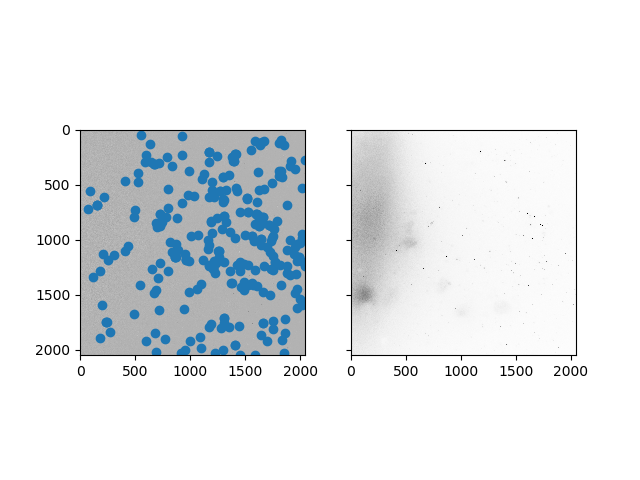

In [24]:
%matplotlib notebook
from skimage.feature import peak_local_max
z = 5
img = result[:,:,z]
beads2 = peak_local_max(img,threshold_rel=0.3)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].scatter(beads2[:,1],beads2[:,0])
ax[0].imshow(img,cmap='Greys')
ax[1].imshow(teststk[:,:,z],cmap='Greys')
plt.show()

In [11]:
from skimage.feature import peak_local_max
beads2 = peak_local_max(result,threshold_rel=0.3)

In [12]:
len(beads2)

1007

In [14]:
beads = {}
for i in [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    beads[i] = peak_local_max(result,threshold_rel=i)
    print(len(beads[i]))

9919178
5443
1561
1007
676
467
282
168
77


In [170]:
beads = peak_local_max(result,threshold_abs=0.65)

<IPython.core.display.Javascript object>


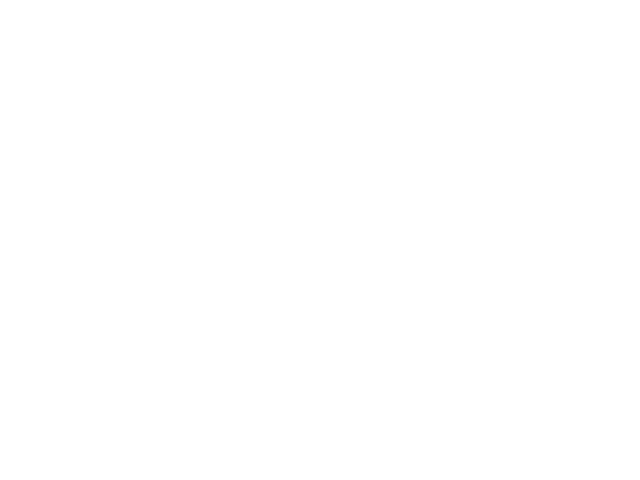

TypeError: Invalid dimensions for image data

In [173]:
%matplotlib notebook
plt.scatter(beads[:,0],beads[:,1])
plt.imshow(result,cmap='Greys')
plt.show()

In [25]:
import pywt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from metadata import Metadata
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(path)
pos = '3-Pos_008_005'
wavelet = 'db2'
beads = {}
masterstart = datetime.datetime.now()
for hybe in md.hybenames:
    start = datetime.datetime.now()
    teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    result = teststk.astype('float64')
    for z in range(teststk.shape[2]):
        img = teststk[:,:,z].copy()
        img_mmin = img-img.min()
        img = (img_mmin)/(np.percentile(img_mmin.ravel(),99))
        coeffs = pywt.wavedec2(img,wavelet)
        keep_list = [1, 2]
        for i in range(1,len(coeffs)+1):
            if i in keep_list:
                continue
            coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
        result[:,:,z] = pywt.waverec2(coeffs,wavelet)
    beads[hybe] = peak_local_max(result,threshold_abs=0.3)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)
masterend = datetime.datetime.now()
print('\n','Total Run')
print('started at',masterstart)
print('ended at',masterend)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe8
started at 2018-12-14 14:42:31.296023
ended at 2018-12-14 14:44:38.188320
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe7
started at 2018-12-14 14:44:38.188961
ended at 2018-12-14 14:46:48.605219
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe9
started at 2018-12-14 14:46:48.605869
ended at 2018-12-14 14:49:01.956991
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe5
started at 2018-12-14 14:49:01.957654
ended at 2018-12-14 14:51:08.474516
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe4
started at 2018-12-14 14:51:08.475151
ended at 2018-12-14 14:53:16.096442
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe3
started at 2018-12-14 14:53:16.097632
ended at 2018-12-14 14:55:26.435947
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe1
started at 2018-12-14 14:55:26.436563


In [39]:
import pywt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import match_template,peak_local_max
from metadata import Metadata
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
bead_template = pickle.load(open('/home/zach/PythonRepos/PySpots/hybescope_config/Avg_Bead.pkl','rb'))
md = Metadata(path)
pos = '3-Pos_008_005'
wavelet = 'db2'
beads_old = {}
masterstart = datetime.datetime.now()
for hybe in md.hybenames:
    start = datetime.datetime.now()
    ref_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    
    ref_match = match_template(ref_stk, bead_template, pad_input=True)
    beads_old[hybe] = peak_local_max(result,threshold_abs=0.65)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)
masterend = datetime.datetime.now()
print('\n','Total Run')
print('started at',masterstart)
print('ended at',masterend)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe8
started at 2018-12-14 15:38:51.859773
ended at 2018-12-14 15:43:27.088487
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe7
started at 2018-12-14 15:43:27.089144
ended at 2018-12-14 15:48:20.414073
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe9
started at 2018-12-14 15:48:20.415433
ended at 2018-12-14 15:52:55.610832
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe5
started at 2018-12-14 15:52:55.611482
ended at 2018-12-14 15:57:39.154015
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe4
started at 2018-12-14 15:57:39.154731
ended at 2018-12-14 16:02:13.107318
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe3
started at 2018-12-14 16:02:13.107964
ended at 2018-12-14 16:06:52.131536
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe1
started at 2018-12-14 16:06:52.132318


In [49]:
import pywt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import match_template,peak_local_max
from metadata import Metadata
import trackpy
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
bead_template = pickle.load(open('/home/zach/PythonRepos/PySpots/hybescope_config/Avg_Bead.pkl','rb'))
md = Metadata(path)
pos = '3-Pos_008_005'
wavelet = 'db2'
beads_old = {}
masterstart = datetime.datetime.now()
for hybe in md.hybenames:
    start = datetime.datetime.now()
    ref_stk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    ref_mmin = ref_stk-np.percentile(img_mmin.ravel(),1)
    ref_stk = (ref_mmin)/(np.percentile(ref_mmin.ravel(),99))
    ref_stk = np.swapaxes(np.swapaxes(ref_stk,1,2),0,1)
    bead_df = trackpy.locate(ref_stk,(5,7,7),percentile=90, preprocess=False,engine='numba')
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)
masterend = datetime.datetime.now()
print('\n','Total Run')
print('started at',masterstart)
print('ended at',masterend)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe8
started at 2018-12-18 10:48:45.935400
ended at 2018-12-18 10:52:05.544317
opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


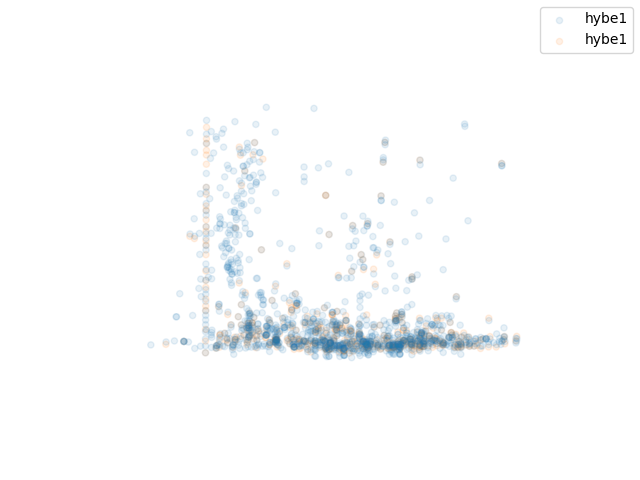

In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
comp_hybe = 'hybe1'
fig = plt.figure()
ax = Axes3D(fig)
for hybe in beads.keys():
    if hybe == comp_hybe:
        coord = beads[hybe]
        X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
        cset = ax.scatter(X, Y, Z,alpha=0.1,label=hybe)
for hybe in beads_old.keys():
    if hybe == comp_hybe:
        coord = beads_old[hybe]
        X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
        cset = ax.scatter(X, Y, Z,alpha=0.1,label=hybe)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
ax.legend()
plt.axis('off')
plt.show()

In [130]:
result.min()

-13418.483586878032

In [30]:
from analysis_scripts.find_tforms import *
inputs = {'posname': pos, 'hybe_dict': beads}
tform_result = ensembl_bead_reg(inputs, reg_ref='hybe1', max_dist=200,dbscan_eps=3, dbscan_min_samples=20)

In [31]:
tform_result

('3-Pos_008_005',
 {'hybe1': (array([0, 0, 0]), 0, inf),
  'hybe8': (array([ 4.28586961e-06, -1.22454586e-06,  8.11233992e-01]),
   5.174459770404497,
   2181),
  'hybe7': (array([2.59205136e-05, 1.07787265e-01, 1.26167503e-04]),
   4.94149653256217,
   2128),
  'hybe9': (array([ 1.21120640e-06,  7.04520411e-06, -8.90687197e-06]),
   5.7106808755605645,
   2166),
  'hybe5': (array([-6.40947456e-01, -3.99048445e-01,  1.38530659e-05]),
   4.088902616874225,
   1992),
  'hybe4': (array([ 3.72939420e-02, -1.81435583e-05, -2.81318793e-03]),
   4.7218394541119775,
   2478),
  'hybe3': (array([ 1.99990873,  0.14497381, -1.00001517]),
   4.017483125397122,
   2353),
  'hybe6': (array([ 7.27212955e-05,  5.12463336e-06, -1.38936913e+00]),
   5.088493698625141,
   2412),
  'hybe2': (array([1.99695305e+00, 1.18077724e-06, 5.67792560e-05]),
   3.5961748368492046,
   2458)})

In [33]:
tforms_old = pickle.load(open('/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/results/tforms2.pkl','rb'))

In [36]:
tforms_old['good'][pos]

{'hybe1': (array([0, 0, 0]), 0, inf),
 'hybe2': (array([2.19974949, 0.5961523 , 0.20000682]),
  0.23756435259181086,
  884),
 'hybe3': (array([ 3.00000022,  0.40026642, -1.00005816]),
  0.28197058514825474,
  876),
 'hybe4': (array([2.00485935e-05, 5.99944109e-01, 1.99889325e-01]),
  0.2575258935972038,
  860),
 'hybe5': (array([-1.00007867, -0.39999789,  0.1155599 ]),
  0.22927104825448896,
  830),
 'hybe6': (array([ 1.19999658e+00,  3.81423872e-05, -1.19961393e+00]),
  0.25443994652089447,
  828),
 'hybe7': (array([1.63795738, 0.39996905, 0.40000869]),
  0.24684492650314666,
  804),
 'hybe8': (array([-1.3999997 , -0.39049431,  0.80000131]),
  0.24431445168176688,
  806),
 'hybe9': (array([ 3.20001099,  1.3999927 , -0.20000305]),
  0.24605112613969213,
  789),
 'nucstain': (array([0, 0, 0]), 0, inf)}

<IPython.core.display.Javascript object>


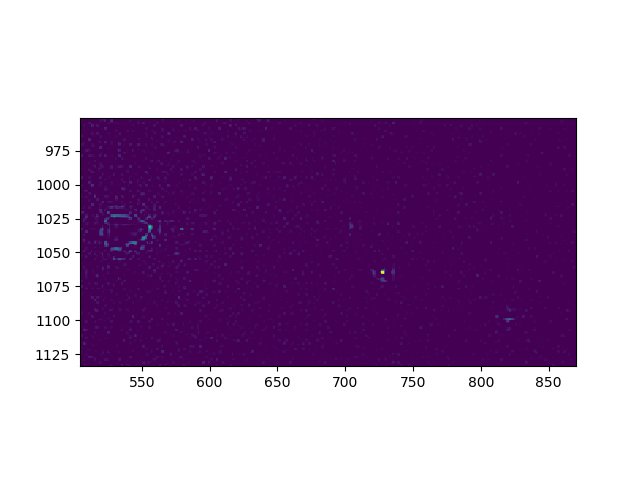

In [133]:
%matplotlib notebook
img = result
plt.imshow(img,vmin = np.percentile(img.ravel(),90))
plt.show()

In [116]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [72]:
tuple([np.zeros_like(v) for v in coeffs[-i]])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [73]:
 coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])

In [ ]:
import pywt
import numpy as np

from skimage.filters import gaussian
from skimage.feature import peak_local_max
import datetime
new_bead_dict = {}
new_bead_dict[pos] = {}
for hybe in md.hybenames:
    start = datetime.datetime.now()
    teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    dog = teststk.astype('float64')
    dog = (dog-dog.min())/((dog-dog.min()).max())
    for i in range(teststk.shape[2]):
        img = dog[:,:,i]
        dog[:,:,i] = img - gaussian(img,10)
    new_bead_dict[pos][hybe] = peak_local_max(dog, threshold_abs=0.65)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)

In [44]:
import pywt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from metadata import Metadata
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
md = Metadata(path)
pos = '3-Pos_008_005'
wavelet = 'db2'
beads = {}
masterstart = datetime.datetime.now()
for hybe in ['hybe1']:#md.hybenames:
    start = datetime.datetime.now()
    teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    result = teststk.astype('float64')
    for z in range(teststk.shape[2]):
        img = teststk[:,:,z].copy()
        img_mmin = img-img.min()
        img = (img_mmin)/(np.percentile(img_mmin.ravel(),99))
        coeffs = pywt.wavedec2(img,wavelet)
        keep_list = [1, 2]
        for i in range(1,len(coeffs)+1):
            if i in keep_list:
                continue
            coeffs[-i] = tuple([np.zeros_like(v) for v in coeffs[-i]])
        result[:,:,z] = pywt.waverec2(coeffs,wavelet)
    beads[hybe] = peak_local_max(result,threshold_abs=0.4)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)
masterend = datetime.datetime.now()
print('\n','Total Run')
print('started at',masterstart)
print('ended at',masterend)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif
 hybe1
started at 2018-12-18 10:20:34.562935
ended at 2018-12-18 10:22:43.785453

 Total Run
started at 2018-12-18 10:20:34.562336
ended at 2018-12-18 10:22:43.787319


In [15]:
import matplotlib.pyplot as plt
from skimage.transform import resize
upsamp_factor = 5
#for y, x, z in beads[hybe]:
[x,y,z]=beads[hybe][30]  
substk = teststk[y-5:y+6, x-5:x+6, z-2:z+3]
if substk.shape[0] != 11 or substk.shape[1] != 11:
    continue # candidate too close to edge
try:
    upsamp_substk = resize(substk,
                           (substk.shape[0]*upsamp_factor,
                            substk.shape[1]*upsamp_factor,
                            substk.shape[2]*upsamp_factor))
    plt.title('y='+str(y)+'x='+str(x)+'z='+str(z))
    plt.imshow(upsamp_substk)
    plt.show()
except:
    continue

TypeError: 'numpy.int64' object is not iterable

In [20]:
[x,y,z]=beads[hybe][30]  
substk = teststk[y-5:y+6, x-5:x+6, z-2:z+3]
upsamp_substk = resize(substk,
                       (substk.shape[0]*upsamp_factor,
                        substk.shape[1]*upsamp_factor,
                        substk.shape[2]*upsamp_factor))

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [45]:
for i in range(len(beads[hybe])):
    print(i,beads[hybe][i])

0 [2046 1586    5]
1 [2046 1450    5]
2 [2045 1646   12]
3 [2031 1230    5]
4 [2028  915    5]
5 [2026 1850    5]
6 [2016  690    5]
7 [2010 1166   10]
8 [2005 1298    5]
9 [2002  957    5]
10 [1986 1099    5]
11 [1982 1882    5]
12 [1981 1322   10]
13 [1967 1210    6]
14 [1958 1355    8]
15 [1954 1411    5]
16 [1952 1410    5]
17 [1951 1519    6]
18 [1943  695   11]
19 [1943  692   11]
20 [1942  397    5]
21 [1923  995    5]
22 [1919  596    5]
23 [1918 1695    5]
24 [1911 1831    6]
25 [1910 1555   93]
26 [1902  544    7]
27 [1900 1707    5]
28 [1900  770    5]
29 [1892  179    5]
30 [1883 1087    6]
31 [1883  294   10]
32 [1875  702    6]
33 [1874  519    6]
34 [1868 1700    5]
35 [1867 1647    5]
36 [1867 1012   10]
37 [1863 1083   25]
38 [1862 1208    7]
39 [1862  598    6]
40 [1856  674    6]
41 [1847 1862    5]
42 [1847  678    5]
43 [1843  531    6]
44 [1843  344    9]
45 [1839  274    5]
46 [1835 1142   11]
47 [1829  790    7]
48 [1828  788    6]
49 [1827 1107   15]
50 [1827  

634 [755 426  80]
635 [ 746 1526    5]
636 [ 746 1451    5]
637 [745 646   6]
638 [ 744 1527    5]
639 [742 568   6]
640 [ 739 1124    7]
641 [735 488  99]
642 [ 726 1413    5]
643 [726 499   5]
644 [724 820  10]
645 [ 723 1482    6]
646 [723  72   5]
647 [722 818  10]
648 [710 802   6]
649 [710 800   5]
650 [710 419  88]
651 [708 802   6]
652 [ 705 1222    7]
653 [ 704 1919   17]
654 [ 704 1790    8]
655 [ 703 1791    6]
656 [ 702 1575   68]
657 [702 495  78]
658 [ 700 1791    9]
659 [ 700 1575   70]
660 [ 700 1575   68]
661 [ 696 2038    6]
662 [ 695 1206    6]
663 [ 694 1110    6]
664 [ 688 1882    5]
665 [686 978   6]
666 [682 158   5]
667 [682 156   5]
668 [680 158   5]
669 [ 676 1519    9]
670 [671 836   4]
671 [ 662 1059   11]
672 [662 923   5]
673 [ 658 1326    6]
674 [655 492  55]
675 [ 654 1603    5]
676 [ 654 1299    5]
677 [651 918   6]
678 [ 646 1262   15]
679 [646 437  46]
680 [642 604  24]
681 [ 638 1304    5]
682 [636 371  32]
683 [ 632 1303    5]
684 [631 475  68]
685 

<IPython.core.display.Javascript object>


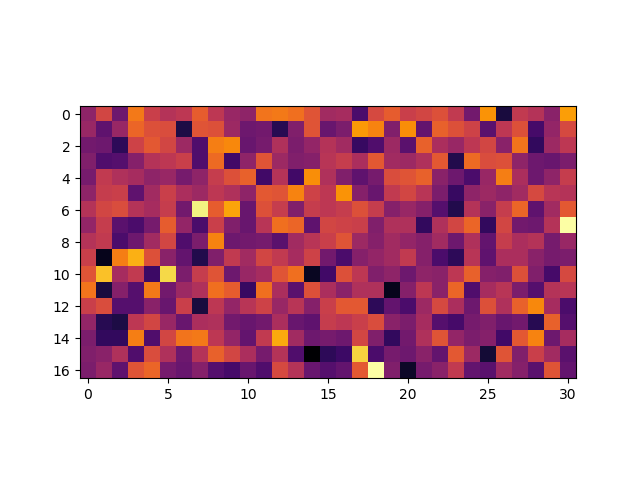

In [166]:
%matplotlib notebook
[y,x,z]=beads[hybe][100]  
substk = teststk[y-15:y+16, x-15:x+16, z]
plt.imshow(substk[:,:],cmap='inferno')

<IPython.core.display.Javascript object>


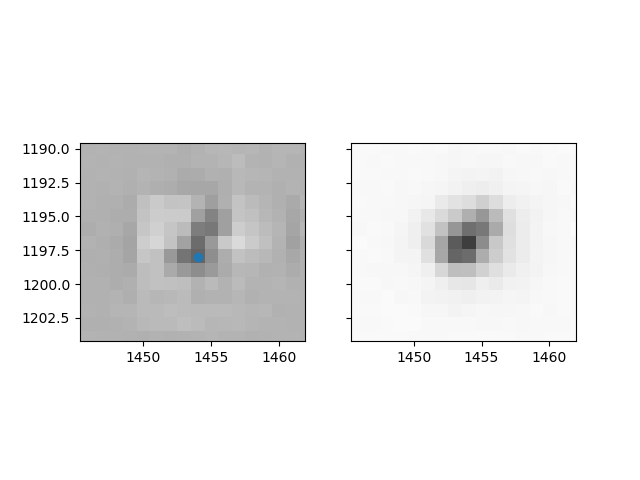

In [42]:
%matplotlib notebook
from skimage.feature import peak_local_max
z = 5
img = result[:,:,z]
beads2 = peak_local_max(img,threshold_rel=0.3)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].scatter(beads2[:,1],beads2[:,0])
ax[0].imshow(img,cmap='Greys')
ax[1].imshow(teststk[:,:,z],cmap='Greys')
plt.show()

<IPython.core.display.Javascript object>


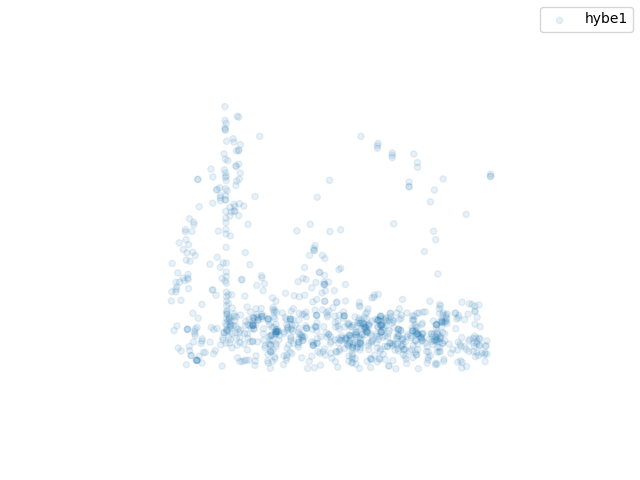

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
comp_hybe = 'hybe1'
fig = plt.figure()
ax = Axes3D(fig)
for hybe in beads.keys():
    if hybe == comp_hybe:
        coord = beads[hybe]
        X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
        cset = ax.scatter(X, Y, Z,alpha=0.1,label=hybe)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
ax.legend()
plt.axis('off')
plt.show()

In [75]:
import pywt
import numpy as np
import datetime
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from metadata import Metadata
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
import pickle
path = '/hybedata/Images/Zach/FISH_Troubleshooting/Predigest_WholeMount_First_2018Nov23-Corrected/'
# md = Metadata(path)
pos = '3-Pos_008_005'
wavelet = 'db2'
beads = {}
masterstart = datetime.datetime.now()
for hybe in ['hybe1']:#md.hybenames:
    start = datetime.datetime.now()
    teststk = md.stkread(Channel='DeepBlue',Position=pos, hybe=hybe)
    ref = teststk.astype('float64')
    ref_mmin = ref-np.percentile(teststk.ravel(),1)
    ref = (ref_mmin)/(np.percentile(ref_mmin.ravel(),99))
    ref_gray = rgb2gray(ref)
    beads[hybe] = blob_log(ref_gray,min_sigma = 0.1, threshold=.1)
    end = datetime.datetime.now()
    print('\n',hybe)
    print('started at',start)
    print('ended at',end)
masterend = datetime.datetime.now()
print('\n','Total Run')
print('started at',masterstart)
print('ended at',masterend)

opening img_3-Pos_008_005_000000103_000000000_DeepBlue_000_103.tif

KeyboardInterrupt: 

In [ ]:
len(beads[hybe])

<IPython.core.display.Javascript object>


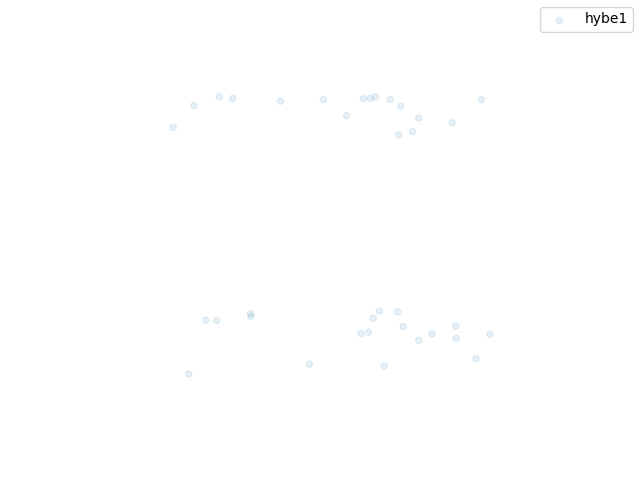

In [73]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
comp_hybe = 'hybe1'
fig = plt.figure()
ax = Axes3D(fig)
for hybe in beads.keys():
    if hybe == comp_hybe:
        coord = beads[hybe]
        X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
        cset = ax.scatter(X, Y, Z,alpha=0.1,label=hybe)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
ax.legend()
plt.axis('off')
plt.show()

In [52]:
start = datetime.datetime.now()
ref_mmin = ref-np.percentile(teststk.ravel(),1)
ref = (ref_mmin)/(np.percentile(ref_mmin.ravel(),99))
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)


 hybe1
started at 2018-12-18 13:01:13.871353
ended at 2018-12-18 13:01:53.442961


In [53]:
start = datetime.datetime.now()
ref_mmin = ref-teststk.min()
ref = (ref_mmin)/ref_mmin.max()
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)


 hybe1
started at 2018-12-18 13:07:15.422335
ended at 2018-12-18 13:07:24.433206


<IPython.core.display.Javascript object>


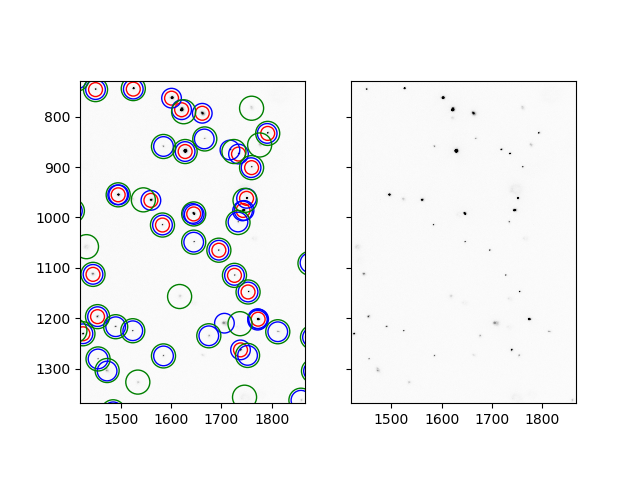

In [167]:
%matplotlib notebook
from skimage.feature import peak_local_max
from scipy.ndimage.filters import gaussian_filter
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
z = 5
img = teststk[:,:,z]
#img = gaussian_filter(img,1)
ref = img.astype('float64')
ref_mmin = ref-img.min()
ref = (ref_mmin)/ref_mmin.max()
ref_gray = rgb2gray(ref)
beads = peak_local_max(gaussian_filter(ref,1),threshold_rel=0.5,min_distance=20)
beads2 = blob_log(ref_gray,min_sigma = 1, threshold=.1)
beads3 = blob_dog(ref_gray,min_sigma = 1, threshold=.1)
beads4 = blob_doh(ref_gray,min_sigma = 1, threshold=.1)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax[0].scatter(beads[:,1],beads[:,0],s=100,facecolors='none', edgecolors='r')
ax[0].scatter(beads2[:,1],beads2[:,0],s=200,facecolors='none', edgecolors='b')
ax[0].scatter(beads3[:,1],beads3[:,0],s=300,facecolors='none', edgecolors='g')
ax[0].scatter(beads4[:,1],beads4[:,0],s=400,facecolors='none', edgecolors='k')
ax[0].imshow(ref,cmap='Greys')
ax[1].imshow(teststk[:,:,z],cmap='Greys')
plt.show()

In [128]:
start = datetime.datetime.now()
ref = teststk.astype('float64')
beads = peak_local_max(gaussian_filter(ref,1),threshold_rel=0.5,min_distance=20)
print(len(beads))
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)

82492

 hybe1
started at 2018-12-18 15:11:41.197432
ended at 2018-12-18 15:12:57.442398


In [142]:
start = datetime.datetime.now()
beads = {}
ref = teststk-gaussian_filter(teststk,10)
beads['hybe1'] = peak_local_max(gaussian_filter(ref,1),threshold_rel=0.6)
print(len(beads['hybe1']))
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)

2319692

 hybe1
started at 2018-12-18 15:29:17.779368
ended at 2018-12-18 15:32:07.181947


<IPython.core.display.Javascript object>


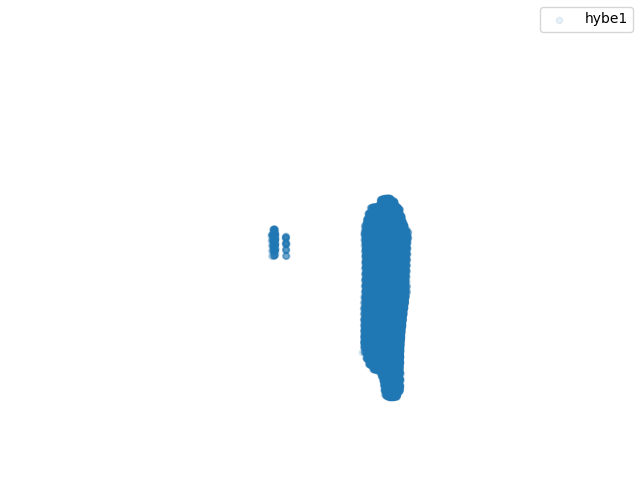

In [139]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
comp_hybe = 'hybe1'
fig = plt.figure()
ax = Axes3D(fig)
for hybe in beads.keys():
    if hybe == comp_hybe:
        coord = beads[hybe]
        X, Y, Z = coord[:,0], coord[:,1], coord[:,2]
        cset = ax.scatter(X, Y, Z,alpha=0.1,label=hybe)
ax.clabel(cset, fontsize=9, inline=1)
ax.grid(False)
ax.legend()
plt.axis('off')
plt.show()

In [125]:
beads = blob_log(ref,min_sigma = 1, threshold=.1)

ValueError: The parameter `image` must be a 2-dimensional array

In [ ]:
start = datetime.datetime.now()
beads = []
for z in range(teststk.shape[2]):
    ref = teststk.astype('float64')
    ref_mmin = ref-ref.min()
    ref = (ref_mmin)/ref_mmin.max()
    ref_gray = rgb2gray(ref)
    temp = blob_log(ref_gray,min_sigma = 1, threshold=.1)
print(len(beads))
end = datetime.datetime.now()
print('\n',hybe)
print('started at',start)
print('ended at',end)

In [168]:
peaks = peak

2048